In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage

In [ ]:
train_file = 'train_catvnoncat.h5'
test_file = 'test_catvnoncat.h5'

In [3]:
def load_dataset():
    train_dataset = h5py.File(train_file, 'r')
    X_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])

    train_dataset = h5py.File(test_file, 'r')
    X_test = np.array(train_dataset["test_set_x"][:])
    y_test = np.array(train_dataset['test_set_y'][:])

    classes = ['non-cat', 'cat']

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    return X_train, X_test, y_train, y_test, classes

In [4]:
X_train, X_test, y_train, y_test, classes = load_dataset()

In [5]:
print('X_train.shape= ', X_train.shape)
print('X_test.shape= ', X_test.shape)
print('Y_train.shape= ', y_train.shape)
print('Y_test.shape= ', y_test.shape)

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)


In [6]:
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

In [7]:
print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


y = [1], it's a 'cat' picture.


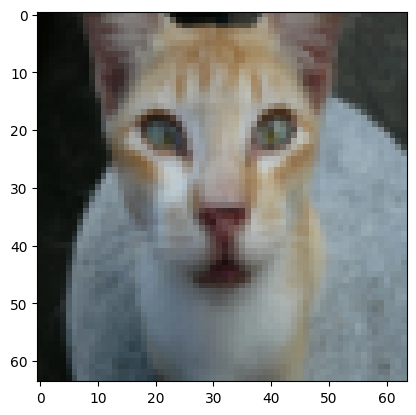

In [8]:
index = 11
plt.imshow(X_train[index])
print ("y = " + str(y_train[index,:]) + ", it's a '" + classes[np.squeeze(y_train[index,:])] +  "' picture.")

y = [0], it's a 'non-cat' picture.


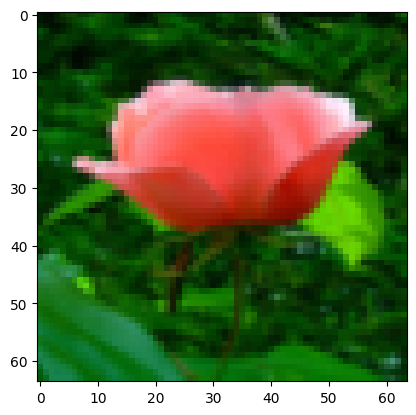

In [9]:
index = 3
plt.imshow(X_train[index])
print ("y = " + str(y_train[index,:]) + ", it's a '" + classes[np.squeeze(y_train[index,:])] +  "' picture.")

In [10]:
print('Label 1 count:', np.sum(y_train != 0))
print('Label 0 count:', np.sum(y_train == 0))

Label 1 count: 72
Label 0 count: 137


In [11]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten =  X_test.reshape(X_test.shape[0], -1)

In [12]:
print("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


In [13]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

In [14]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [15]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [67]:
def initialize_with_zeros(dim):
    w = np.zeros((1, dim))
    b = 0

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [68]:
dim = 2
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0. 0.]]
b = 0


In [75]:
def propagate(w, b, X, Y, C = 1):
    
    m = X.shape[0]
    
    Z = b + X @ w.T
    A = 1 / (1 + np.exp(-Z))
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + (C / (2 * m)) * np.sum(w ** 2)
      
    dJ_dw = (1 / m) * (A - Y).T @ X + (C / m) * w
    dJ_db = (1 / m) * np.sum(A - Y)

    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return grads, cost

In [76]:
w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y)
print("dJ_dw = " + str(grads["dJ_dw"]))
print("dJ_db = " + str(grads["dJ_db"]))
print("cost = " + str(cost))

dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865


In [79]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C= 1, verbose = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y, C)

        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]

        w -= learning_rate * dJ_dw
        b -= learning_rate * dJ_db

        if i % 100 == 0:
            costs.append(cost)
            
        if verbose and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs

In [80]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dJ_dw"]))
print("db = " + str(grads["dJ_db"]))

w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[0.62090316 1.19256883]]
db = 0.2084129285706479


In [62]:
def predict(w, b, X):
    m, n = X.shape
    assert (w.shape==(1, n))
    
    Z = b + X @ w.T
    A = 1 / (1 + np.exp(-Z))
 
    Y_prediction = (A >= 0.5).astype(int)
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

In [64]:
w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print("predictions = \n{}".format(predict(w, b, X)))

predictions = 
[[1]
 [1]
 [0]]


In [81]:
def model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.5, verbose = False, C = 1):
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)

    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, verbose, C)
   
    w = parameters["w"]
    b = parameters["b"]
    
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)

    print("train accuracy= {:.3%}".format(np.mean(y_prediction_train == y_train)))
    print("test accuracy= {:.3%}".format(np.mean(y_prediction_test == y_test)))
    
    res = {'costs': costs,
           'y_prediction_test': y_prediction_test, 
           'y_prediction_train': y_prediction_train, 
           'w': w, 
           'b': b,
           'learning_rate' : learning_rate,
           'num_iterations': num_iterations,
           'C': C
          }
    
    return res

In [87]:
res = model(X_train = X_train_scaled,
            y_train = y_train, 
            X_test = X_test_scaled, 
            y_test = y_test, 
            num_iterations = 3000, 
            learning_rate = 0.01, 
            verbose = True,
            C = 0.3
           )

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.571267
Cost after iteration 200: 0.656453
Cost after iteration 300: 1.026070
Cost after iteration 400: 0.738265
Cost after iteration 500: 0.487754
Cost after iteration 600: 0.281921
Cost after iteration 700: 0.171723
Cost after iteration 800: 0.147267
Cost after iteration 900: 0.137672
Cost after iteration 1000: 0.130244
Cost after iteration 1100: 0.124013
Cost after iteration 1200: 0.118645
Cost after iteration 1300: 0.113951
Cost after iteration 1400: 0.109806
Cost after iteration 1500: 0.106118
Cost after iteration 1600: 0.102818
Cost after iteration 1700: 0.099852
Cost after iteration 1800: 0.097175
Cost after iteration 1900: 0.094750
Cost after iteration 2000: 0.092546
Cost after iteration 2100: 0.090537
Cost after iteration 2200: 0.088702
Cost after iteration 2300: 0.087021
Cost after iteration 2400: 0.085478
Cost after iteration 2500: 0.084058
Cost after iteration 2600: 0.082749
Cost after iteration 2700: 0.081540
Cost

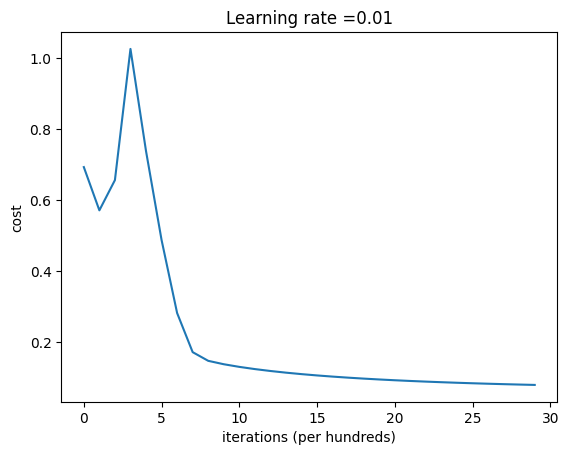

In [88]:
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()

In [90]:
int(y_test[index,0]), int(res["y_prediction_test"][index,0])

(1, 1)

y_predicted = 1 (true label = 1) , you predicted that it is a cat picture.


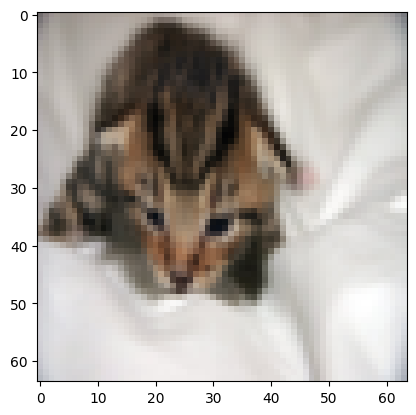

In [91]:
index = 1

plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
y_true = y_test[index,0]
y_predicted =  res["y_prediction_test"][index,0]
print ('y_predicted = {} (true label = {}) , you predicted that it is a {} picture.'.\
       format(y_predicted,
              y_true,
              classes[y_predicted]))

y_predicted = 0 (true label = 1) , you predicted that it is a non-cat picture.


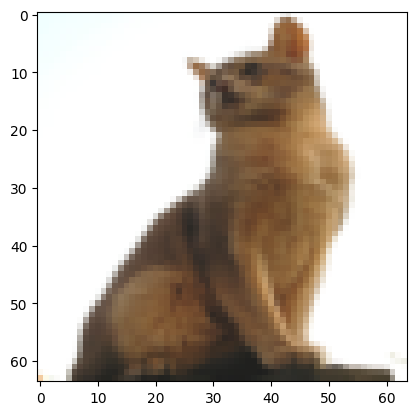

In [92]:
index = 6
plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
y_true = y_test[index,0]
y_predicted =  res["y_prediction_test"][index,0]
print ('y_predicted = {} (true label = {}) , you predicted that it is a {} picture.'.\
       format(y_predicted,
              y_true,
              classes[y_predicted]))

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [100]:
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print('\nBreast cancer dataset')
print('X_cancer.shape= {}'.format(X_cancer.shape))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Breast cancer dataset
X_cancer.shape= (569, 30)
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95
